In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [2]:
data = pd.read_csv("consumer_electronics_sales_data.csv")
data

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...,...
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1


In [3]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.5 MB


In [5]:
data.PurchaseIntent.value_counts()

PurchaseIntent
1    5098
0    3902
Name: count, dtype: int64

In [6]:
data.ProductCategory.value_counts()

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

In [7]:
data.ProductBrand.value_counts()

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

In [9]:
data.CustomerGender.value_counts()

CustomerGender
1    4580
0    4420
Name: count, dtype: int64

In [10]:
data.CustomerSatisfaction.value_counts()

CustomerSatisfaction
3    1848
2    1814
4    1798
1    1775
5    1765
Name: count, dtype: int64

In [13]:
data.PurchaseFrequency.describe()

count    9000.000000
mean       10.054667
std         5.461328
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        19.000000
Name: PurchaseFrequency, dtype: float64

In [8]:
data.CustomerAge.describe()

count    9000.000000
mean       43.347000
std        15.055084
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: CustomerAge, dtype: float64

<Figure size 2000x1000 with 0 Axes>

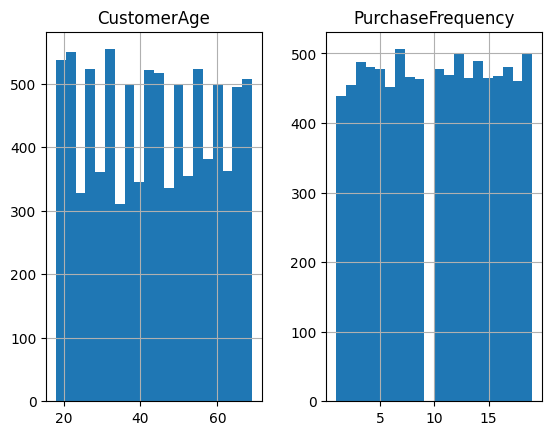

In [21]:
plt.figure(figsize=(20, 10))
data[["CustomerAge", "PurchaseFrequency"]].hist(bins=20);

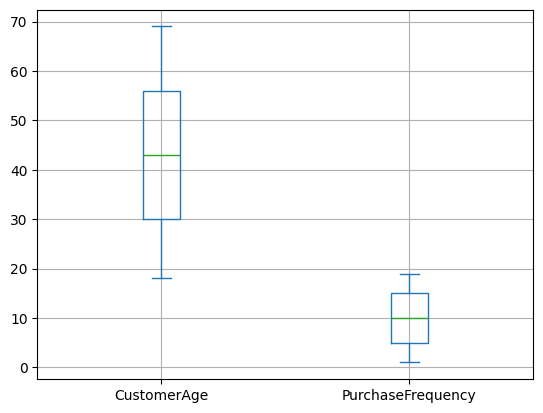

In [23]:
data[["CustomerAge", "PurchaseFrequency"]].plot.box()
plt.grid()

In [29]:
x, y = data.drop("PurchaseIntent", axis=1), data["PurchaseIntent"].values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
x_train

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction
6157,12031,Smartphones,Sony,1857.648335,27,0,8,4
2923,8797,Smart Watches,Apple,1063.964976,41,1,3,2
5155,11029,Tablets,Samsung,1945.571622,57,1,1,2
31,5905,Tablets,HP,1342.583389,28,1,17,4
7628,13502,Laptops,HP,1587.167223,27,0,8,1
...,...,...,...,...,...,...,...,...
4373,10247,Laptops,Sony,323.291695,51,1,6,5
7891,13765,Headphones,Other Brands,2793.293586,41,0,4,3
4859,10733,Tablets,Sony,984.264417,32,0,9,3
3264,9138,Headphones,Samsung,2588.859444,26,1,1,3


In [32]:
x_train.drop("ProductID", axis=1, inplace=True)
x_test.drop("ProductID", axis=1, inplace=True)

In [49]:
onehot = OneHotEncoder(sparse_output=False,)
m = onehot.fit_transform(x_train[["ProductCategory", "ProductBrand"]])
m

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(7200, 10))

In [48]:
onehot.categories_

[array(['Headphones', 'Laptops', 'Smart Watches', 'Smartphones', 'Tablets'],
       dtype=object),
 array(['Apple', 'HP', 'Other Brands', 'Samsung', 'Sony'], dtype=object)]

In [50]:
onehot.feature_names_in_

array(['ProductCategory', 'ProductBrand'], dtype=object)

In [55]:
columns = []
for i, c in enumerate(onehot.feature_names_in_):
    for cat in onehot.categories_[i]:
        columns.append(c + "_" + cat)
columns

['ProductCategory_Headphones',
 'ProductCategory_Laptops',
 'ProductCategory_Smart Watches',
 'ProductCategory_Smartphones',
 'ProductCategory_Tablets',
 'ProductBrand_Apple',
 'ProductBrand_HP',
 'ProductBrand_Other Brands',
 'ProductBrand_Samsung',
 'ProductBrand_Sony']

In [58]:
dm = pd.DataFrame(m, columns=columns, index=x_train.index)
dm

,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
6157,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2923,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7628,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4859,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
x_train = pd.concat([x_train, dm], axis=1).drop(['ProductCategory', 'ProductBrand'], axis=1)
x_train

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
6157,1857.648335,27,0,8,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2923,1063.964976,41,1,3,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5155,1945.571622,57,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31,1342.583389,28,1,17,4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7628,1587.167223,27,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,323.291695,51,1,6,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7891,2793.293586,41,0,4,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4859,984.264417,32,0,9,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3264,2588.859444,26,1,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
m_t = onehot.transform(x_test[["ProductCategory", "ProductBrand"]])
dm_t = pd.DataFrame(m_t, columns=columns, index=x_test.index)
x_test = pd.concat([x_test, dm_t], axis=1).drop(['ProductCategory', 'ProductBrand'], axis=1)
x_test

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
4424,2448.873905,68,0,8,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1726,2369.335828,69,0,10,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7895,974.115727,60,1,9,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7586,1120.454253,43,0,2,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1986,2499.506220,63,0,4,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,177.382102,37,1,18,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4394,1155.725864,20,1,7,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7193,1169.379639,20,1,15,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6280,655.132026,41,0,11,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
sc = MinMaxScaler()
x_train_sc = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_sc = pd.DataFrame(sc.transform(x_test), columns=x_test.columns, index=x_test.index)

In [63]:
x_train_sc

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
6157,0.606065,0.176471,0.0,0.388889,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2923,0.332332,0.450980,1.0,0.111111,0.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5155,0.636389,0.764706,1.0,0.000000,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31,0.428425,0.196078,1.0,0.888889,0.75,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7628,0.512779,0.176471,0.0,0.388889,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.076881,0.647059,1.0,0.277778,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7891,0.928760,0.450980,0.0,0.166667,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4859,0.304844,0.274510,0.0,0.444444,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3264,0.858253,0.156863,1.0,0.000000,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
model = LogisticRegression()
model.fit(x_train_sc, y_train)
p_train = model.predict(x_train_sc)
p_test = model.predict(x_test_sc)
print(f"Train acc: {accuracy_score(y_train, p_train):.3f}, Test acc: {accuracy_score(y_test, p_test):.3f}")

Train acc: 0.853, Test acc: 0.862


In [65]:
model = GaussianNB()
model.fit(x_train_sc, y_train)
p_train = model.predict(x_train_sc)
p_test = model.predict(x_test_sc)
print(f"Train acc: {accuracy_score(y_train, p_train):.3f}, Test acc: {accuracy_score(y_test, p_test):.3f}")

Train acc: 0.868, Test acc: 0.874


In [84]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train_sc, y_train)
p_train = model.predict(x_train_sc)
p_test = model.predict(x_test_sc)
print(f"Train acc: {accuracy_score(y_train, p_train):.3f}, Test acc: {accuracy_score(y_test, p_test):.3f}")

Train acc: 0.913, Test acc: 0.905


In [95]:
model = DecisionTreeClassifier(max_depth=7, min_samples_split=3, min_samples_leaf=3, criterion='gini')
model.fit(x_train_sc, y_train)
p_train = model.predict(x_train_sc)
p_test = model.predict(x_test_sc)
print(f"Train acc: {accuracy_score(y_train, p_train):.3f}, Test acc: {accuracy_score(y_test, p_test):.3f}")

Train acc: 0.954, Test acc: 0.956


In [104]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=3, min_samples_leaf=3, criterion='gini')
model.fit(x_train_sc, y_train)
p_train = model.predict(x_train_sc)
p_test = model.predict(x_test_sc)
print(f"Train acc: {accuracy_score(y_train, p_train):.3f}, Test acc: {accuracy_score(y_test, p_test):.3f}")

Train acc: 0.952, Test acc: 0.958
